In [96]:
import matplotlib.pyplot as plt, math
from numpy import correlate

In [97]:
# question 1
rand_nums = [123]
for i in range(1, 200):
    new_rand = (65539 * rand_nums[i-1] + 17) % (2**31)
    rand_nums.append(new_rand)

rand_nums = [x / 2**31 for x in rand_nums]
below_5 = sum([1 if x < .5 else 0 for x in rand_nums ])
    
print(f"Proportion below .5 = {below_5/201}")
print(rand_nums)

Proportion below .5 = 0.48756218905472637
[5.727633833885193e-08, 0.003753841854631901, 0.023041318636387587, 0.10498211812227964, 0.4230396240018308, 0.5939174639061093, 0.7566669504158199, 0.19526331033557653, 0.3620960912667215, 0.41572553757578135, 0.23600718704983592, 0.6750320671126246, 0.9266465022228658, 0.48510919231921434, 0.5713554169051349, 0.06266855355352163, 0.23433135217055678, 0.8424899140372872, 0.9464760976843536, 0.09696614276617765, 0.06403076043352485, 0.5120080607011914, 0.49629030330106616, 0.37018805649131536, 0.755034392233938, 0.19903262797743082, 0.39940502075478435, 0.6056552557274699, 0.03980513056740165, 0.7884522648528218, 0.37298619700595737, 0.14236558135598898, 0.4978364980779588, 0.7062475392594934, 0.7574755358509719, 0.1891441447660327, 0.31810382893308997, 0.2068444536998868, 0.3786510447971523, 0.4108249684795737, 0.057609190698713064, 0.6487492108717561, 0.3745313319377601, 0.40896387677639723, 0.08352005621418357, 0.8209642292931676, 0.17462365

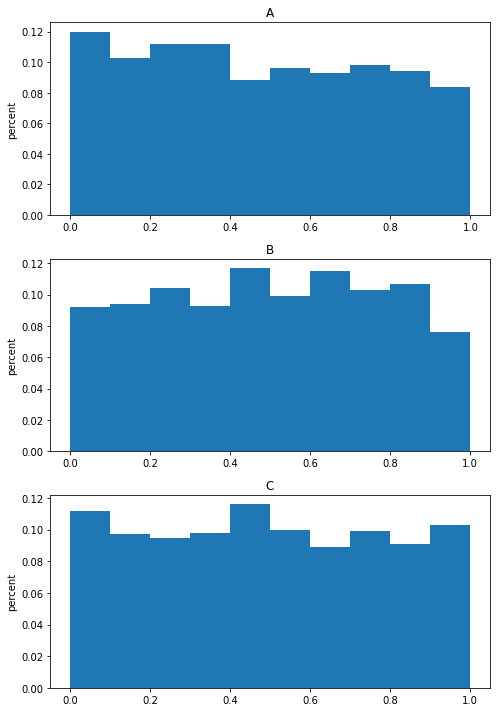

In [98]:
# question 2 a
a = []
b = []
c = []
with open("RandNum.txt") as f:
    for line in f:
        a_num, b_num, c_num = line.split(" ")
        a.append(float(a_num))
        b.append(float(b_num))
        c.append(float(c_num))

weights = [1/len(a) for x in a]

fig, axs = plt.subplots(3, figsize=(7, 10))
axs[0].hist(a, weights=weights)
axs[0].set_title("A")
axs[0].set_ylabel("percent")
axs[1].hist(b, weights=weights)
axs[1].set_title("B")
axs[1].set_ylabel("percent")
axs[2].hist(c, weights=weights)
axs[2].set_title("C")
axs[2].set_ylabel("percent")
fig.tight_layout()
plt.show()

In [99]:
def chi_square(a:list):
    bins = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in range(len(a)):
        binned_a = math.floor(a[i] * 10)
        if binned_a == 10:
            binned_a = 9
        bins[binned_a] += 1

    bins = [x / (len(a) + 1) for x in bins]
    return sum([(x - .1)**2 / .1 for x in bins])

print(f"Chi squared for\nA: {chi_square(a)}\nB: {chi_square(b)}\nC: {chi_square(c)}")

Chi squared for
A: 0.01249599551297853
B: 0.012476035453058431
C: 0.006488017477028467


I'd say a significance level of .05 is good, so yes, they are all normally distributed, especially C.

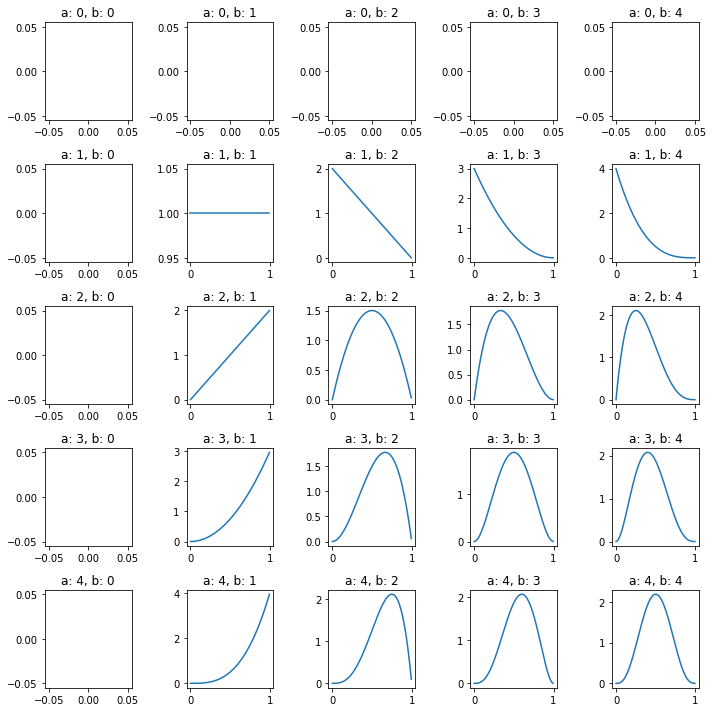

In [100]:
# question 2 b
from scipy.stats import beta
from numpy import arange
x_vals = arange(0, 1, .005)
ab_vals = list(range(0, 5, 1))
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(len(ab_vals)):
    for j in range(len(ab_vals)):
        axs[i, j].plot(x_vals, beta.pdf(x_vals, ab_vals[i], ab_vals[j]))
        axs[i, j].set_title(f"a: {ab_vals[i]}, b: {ab_vals[j]}")

fig.tight_layout()

a = 1 and b = 1 seems to be the closest, though perhaps b could be a little higher.

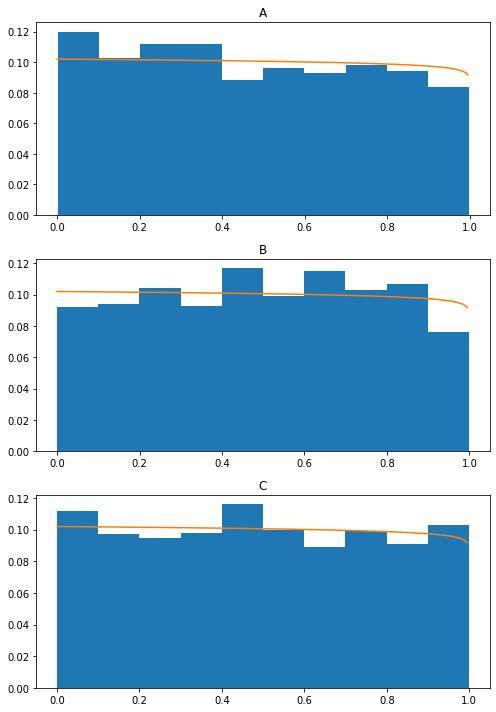

In [101]:
beta_data = beta.pdf(x_vals, 1, 1.02)
beta_data = [x/10 for x in beta_data]

fig, axs = plt.subplots(3, figsize=(7, 10))
axs[0].hist(a, weights=weights)
axs[0].plot(x_vals, beta_data)
axs[0].set_title("A")

axs[1].hist(b, weights=weights)
axs[1].plot(x_vals, beta_data)
axs[1].set_title("B")

axs[2].hist(c, weights=weights)
axs[2].plot(x_vals, beta_data)
axs[2].set_title("C")
fig.tight_layout()
plt.show()

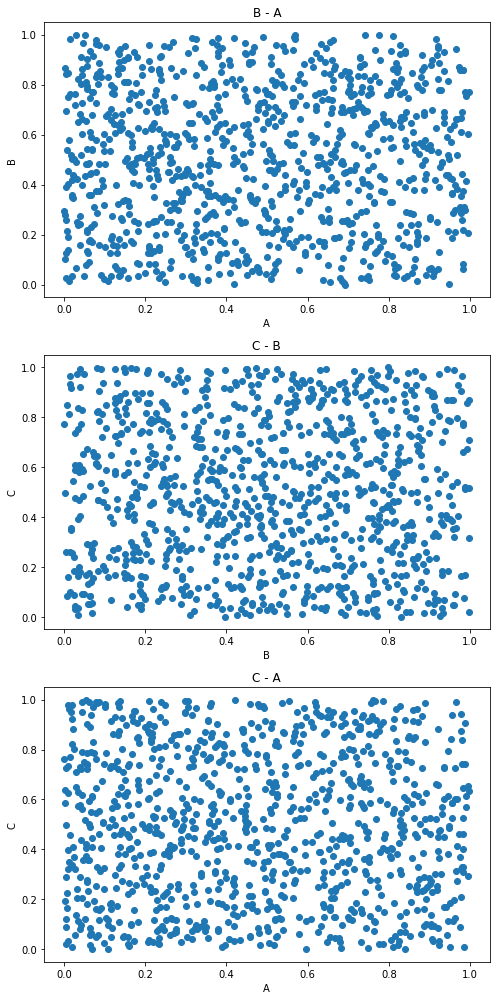

In [102]:
# question 3
fig, axs = plt.subplots(3, figsize=(7, 14))
axs[0].scatter(a, b)
axs[0].set_title("B - A")
axs[0].set_xlabel("A")
axs[0].set_ylabel("B")
axs[1].scatter(b, c)
axs[1].set_title("C - B")
axs[1].set_xlabel("B")
axs[1].set_ylabel("C")
axs[2].scatter(a, c)
axs[2].set_title("C - A")
axs[2].set_xlabel("A")
axs[2].set_ylabel("C")
fig.tight_layout()
plt.show()

On cursory inspection, the data look independent.

In [103]:
# question 4
from statsmodels import api

a_acf = api.tsa.acf(a, nlags=7)
b_acf = api.tsa.acf(b, nlags=7)
c_acf = api.tsa.acf(c, nlags=7)
print("A autocorrelation:")
for i, acf in enumerate(a_acf):
    print(f"lag of {i}: {acf}")
    
print("B autocorrelation:")
for i, acf in enumerate(b_acf):
    print(f"lag of {i}: {acf}")
    
print("C autocorrelation:")
for i, acf in enumerate(c_acf):
    print(f"lag of {i}: {acf}")

A autocorrelation:
lag of 0: 1.0
lag of 1: 0.021870451246976022
lag of 2: -0.04631180607723077
lag of 3: 0.02179011634860153
lag of 4: -0.007943572748572329
lag of 5: -0.030852177592521082
lag of 6: -0.01519048715977118
lag of 7: -0.021789725346276854
B autocorrelation:
lag of 0: 1.0
lag of 1: 0.0203243614857492
lag of 2: -0.004641574064161902
lag of 3: -0.02606634906966556
lag of 4: 0.019162422444675312
lag of 5: 0.034291259524307574
lag of 6: 0.008195128016374259
lag of 7: -0.05079306460636486
C autocorrelation:
lag of 0: 1.0
lag of 1: 0.003824415330086205
lag of 2: -0.020545473176074133
lag of 3: -0.03817995069732289
lag of 4: -0.014000200377177183
lag of 5: -0.00520800738558411
lag of 6: 0.0570061329788082
lag of 7: 0.011642280865930959


These arrays don't look to be autocorrelated at any of the above lags

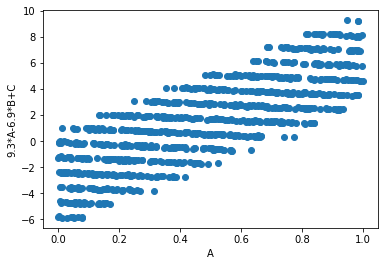

In [104]:
# question 5
abc = []
for i in range(len(a)):
    abc.append(9.3 * a[i] - 6.9 * b[i] + c[i])
plt.scatter(a, abc)
plt.xlabel("A")
plt.ylabel("9.3*A-6.9*B+C")
plt.show()

A, B, and C are clearly not independent

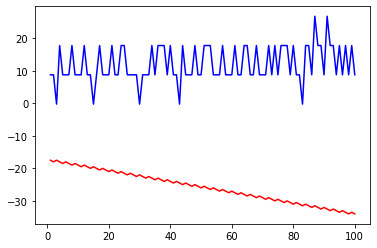

In [105]:
# question 6
def scheme1():
    a_list = []
    for i in range(1, 101):
        a_list.append(i // 3 - i / 2)
    return [x - min(a_list) / max(a_list) - min(a_list) for x in a_list]

def scheme2():
    b = []
    for i in range(1, 101):
        b_list = [*str(i * 747)]
        b.append(sum([int(x) for x in b_list]))
    return [x - min(b) / max(b) - min(b) for x in b]

plt.plot(list(range(1, 101)), scheme1(), c="red")
plt.plot(list(range(1, 101)), scheme2(), c="blue")

They're both pretty bad, and for some reason the first isn't normalizing properly. I suppose the second wins by default, as it has some irregularity.

No time for question 7 :(